In [12]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import tensorflow as tf
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

In [13]:
# TFLite model 불러서 tensor에 할당하기
interpreter = tf.lite.Interpreter(model_path="./Data/FaceGray/best_cnn_face.tflite")
interpreter.allocate_tensors()

In [14]:
# model의 입력과 출력을 정하기
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [15]:
# model의 input과 output의 구성 출력
print("Input Details:")
print(input_details)
print("Output Details:")
print(output_details)

Input Details:
[{'name': 'serving_default_conv2d_22_input:0', 'index': 0, 'shape': array([  1, 400, 300,   1], dtype=int32), 'shape_signature': array([ -1, 400, 300,   1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output Details:
[{'name': 'StatefulPartitionedCall:0', 'index': 17, 'shape': array([1, 3], dtype=int32), 'shape_signature': array([-1,  3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


### 예측하기

In [40]:
path = "./Data/FaceGray/Cathy/image_0010.jpg"
load_img = np.array(Image.open(path).resize((400,300)))
input_data = np.array([load_img],dtype=np.float32)
input_data = input_data/255.0

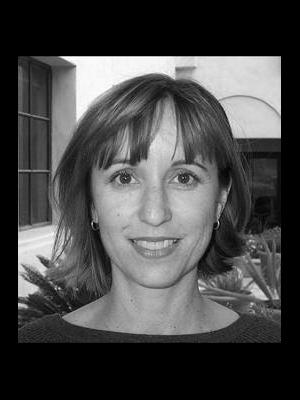

In [41]:
Image.open(path)

In [42]:
# input_data를 input_details에 넣기
interpreter.set_tensor(input_details[0]['index'],input_data.reshape(1,400,300,1))

In [43]:
# 예측하기
interpreter.invoke()

In [44]:
# 예측결과 보기
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[6.4411280e-18 4.8094834e-10 1.0000000e+00]]


In [45]:
dirNames = ['Aiden','Andrew','Cathy']
print(dirNames[np.argmax(output_data[0])])

Cathy
